## Goldsmiths University of London
### Authors...: Sandor Kanda (skand001) + Carlos Alves (cdeol003)
### Created...: 14/02/2023

## Data Mining Coursework

## Import the necessary libraries and load the datasets :

In [16]:
# Import pandas for data manipulation using dataframes
import pandas as pd

# Import numpy for data statistical analysis
import numpy as np

# Import matplotlib for data visualisation
import matplotlib.pyplot as plt

# Load the dataset from the CSV file using pandas
train_data = pd.read_csv('sonar_train.csv')
test_data = pd.read_csv('sonar_test.csv')


## Define a function to compute the Minkowski distance between two points :

In [17]:
# Define a function to compute the Minkowski distance between two points
def minkowski_distance(a, b, q):

    # Compute the sum of the absolute value of the difference between the points raised to the qth power
    return np.power(np.sum(np.power(np.abs(a - b), q)), 1/q)


## Define the simplest Nearest Neighbor algorithm function : 

In [18]:
# Define a function to compute the nearest neighbor of a point
def nearest_neighbor(train_data, test_data, q):

    # Initialise the minimum distance to infinity
    predictions = []

    # Loop through each test point
    for idx, test_point in test_data.iterrows():

        # Initialise the minimum distance to infinity
        min_distance = float('inf')

        # Loop through each training point
        nearest_class = None
        for _, train_point in train_data.iterrows():

            # Compute the distance between the test point and the training point
            distance = minkowski_distance(test_point[:-1], train_point[:-1], q)
            
            # If the distance is less than the minimum distance, update the nearest neighbor and minimum distance
            if distance < min_distance:

                # Update the minimum distance
                min_distance = distance

                # Update the nearest neighbor
                nearest_class = train_point['Class']

        predictions.append(nearest_class)

    return predictions


In [19]:
def compute_metrics(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0

    for true, pred in zip(y_true, y_pred):
        if true == 'M' and pred == 'M':
            tp += 1
        elif true == 'M' and pred == 'R':
            fn += 1
        elif true == 'R' and pred == 'M':
            fp += 1
        elif true == 'R' and pred == 'R':
            tn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_measure = 2 * precision * recall / (precision + recall)

    return accuracy, recall, precision, f1_measure


In [20]:
for q in [1, 2]:
    predictions = nearest_neighbor(train_data, test_data, q)
    accuracy, recall, precision, f1_measure = compute_metrics(test_data['Class'], predictions)
    print(f"Results for q={q}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Recall: {recall}")
    print(f"  Precision: {precision}")
    print(f"  F1 Measure: {f1_measure}")
    print()


Results for q=1:
  Accuracy: 0.8840579710144928
  Recall: 0.9459459459459459
  Precision: 0.8536585365853658
  F1 Measure: 0.8974358974358975

Results for q=2:
  Accuracy: 0.8985507246376812
  Recall: 0.972972972972973
  Precision: 0.8571428571428571
  F1 Measure: 0.9113924050632912



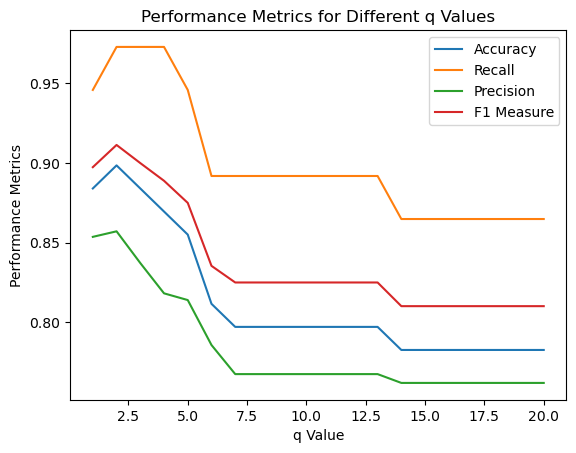

The best accuracy is achieved for q = 2 with an accuracy of 0.8986.


In [21]:
q_values = list(range(1, 21))
accuracies, recalls, precisions, f1_measures = [], [], [], []

for q in q_values:
    predictions = nearest_neighbor(train_data, test_data, q)
    accuracy, recall, precision, f1_measure = compute_metrics(test_data['Class'], predictions)
    
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_measures.append(f1_measure)

plt.plot(q_values, accuracies, label='Accuracy')
plt.plot(q_values, recalls, label='Recall')
plt.plot(q_values, precisions, label='Precision')
plt.plot(q_values, f1_measures, label='F1 Measure')
plt.xlabel('q Value')
plt.ylabel('Performance Metrics')
plt.legend()
plt.title('Performance Metrics for Different q Values')
plt.show()

best_q = np.argmax(accuracies) + 1
best_accuracy = max(accuracies)
print(f"The best accuracy is achieved for q = {best_q} with an accuracy of {best_accuracy:.4f}.")
